In [2]:
library(tidyverse)
library(ggplot2)
library(ggpubr)

In [14]:
insculationScore <- function(mat, w=5) {
    num = dim(mat)[1]
    scores = c()
    for (i in (w+1):(num-w)) {
      score = sum(mat[(i-w):i,i:(i+w)])
        scores = c(scores, score)
    }
    return(scores)
}

### Orca predicted observed/expected

In [15]:
matrix_data = read.table("../testdata/orca_predictions_16Mb.txt", sep = "\t")
mat = as.matrix(matrix_data)
colnames(mat) <- NULL

In [16]:
w=5
scores = insculationScore(mat, w)
data = tibble(pos = seq_along(scores) + width, wildtype=scores)

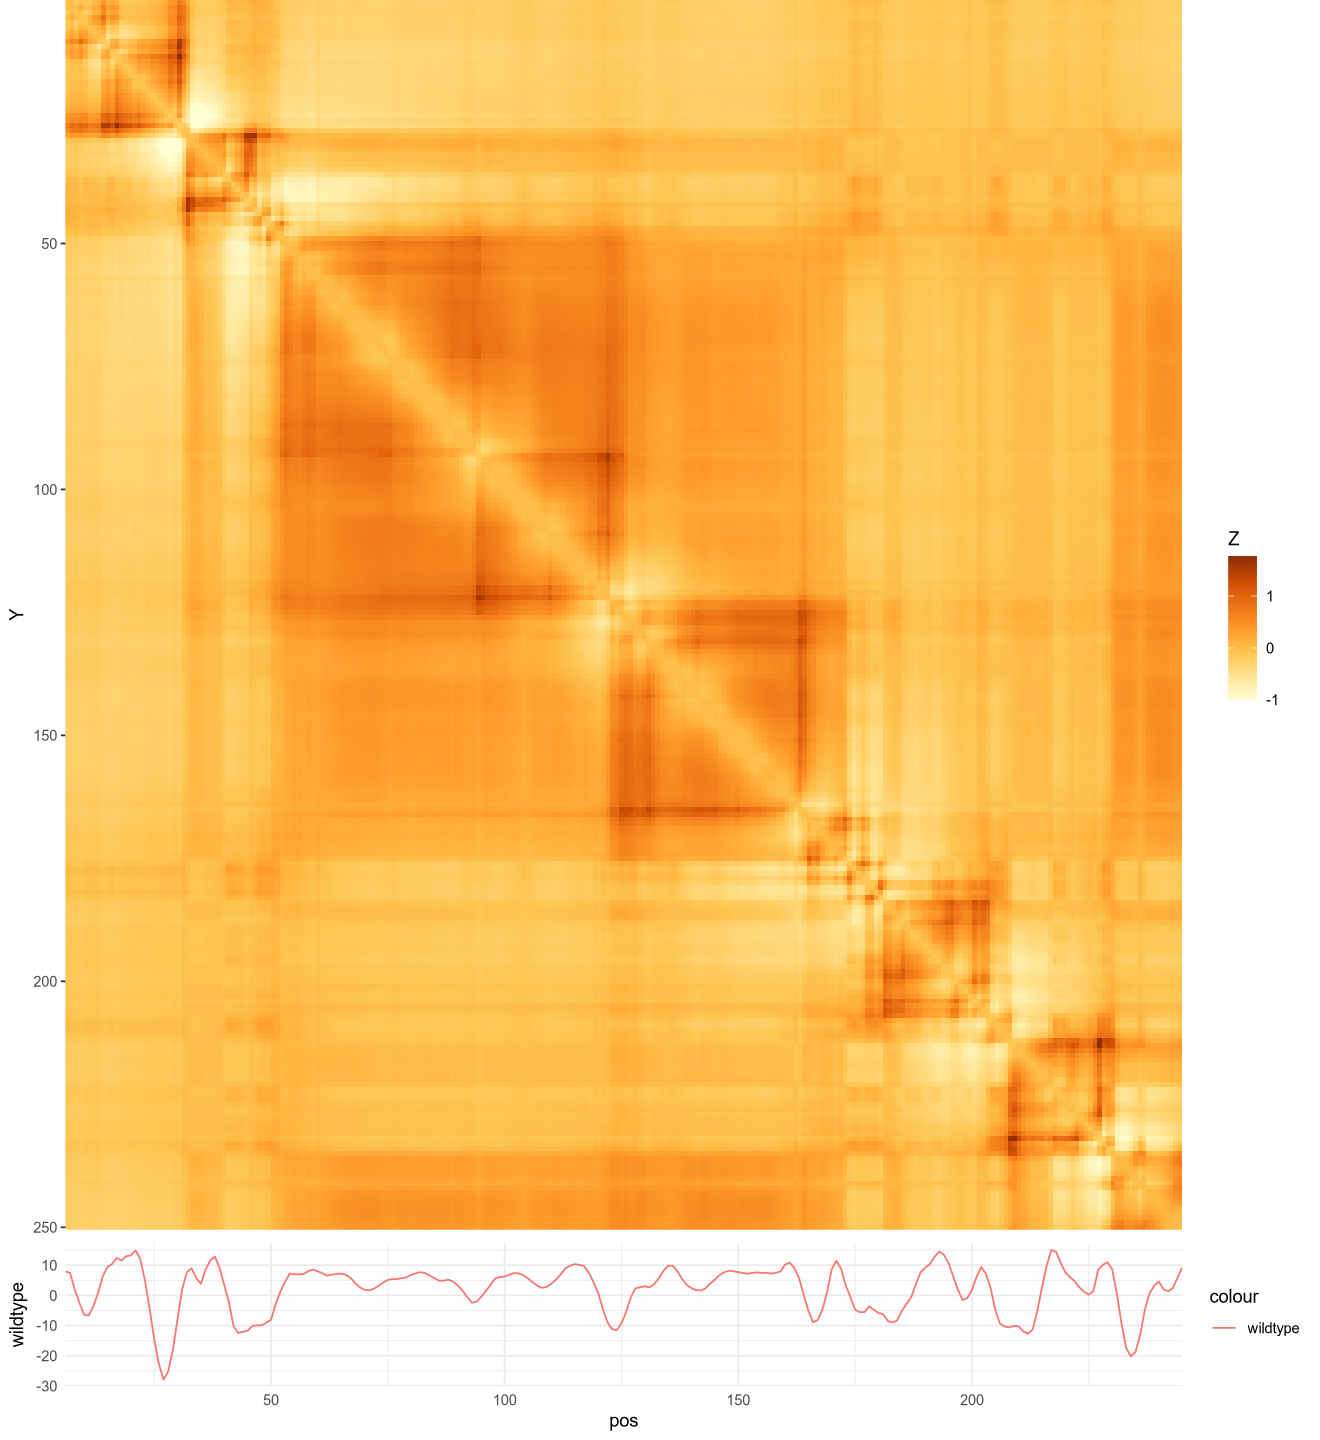

In [17]:
vmin=-1
plotmat = mat
plotmat[plotmat<vmin] = vmin
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = wildtype %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = wildtype, colour = "wildtype")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()
ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")